Results for Naive Bayes:

               Predicted No Disease  Predicted Disease
Is No Disease                    82                 50
Is Disease                       10                115

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.62      0.73       132
           1       0.70      0.92      0.79       125

    accuracy                           0.77       257
   macro avg       0.79      0.77      0.76       257
weighted avg       0.80      0.77      0.76       257


Confusion Matrix:


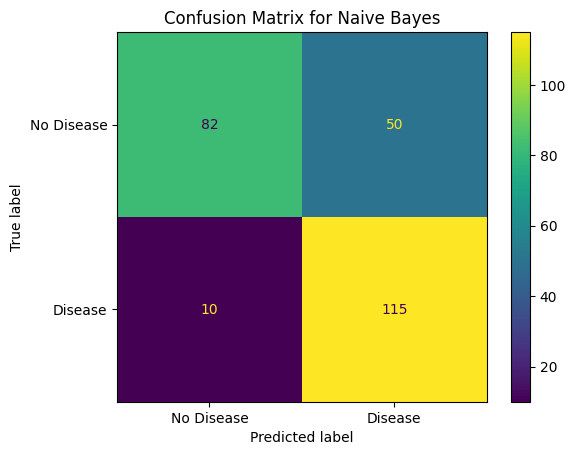

Results for Random Forest:

               Predicted No Disease  Predicted Disease
Is No Disease                   132                  0
Is Disease                        6                119

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       132
           1       1.00      0.95      0.98       125

    accuracy                           0.98       257
   macro avg       0.98      0.98      0.98       257
weighted avg       0.98      0.98      0.98       257


Confusion Matrix:


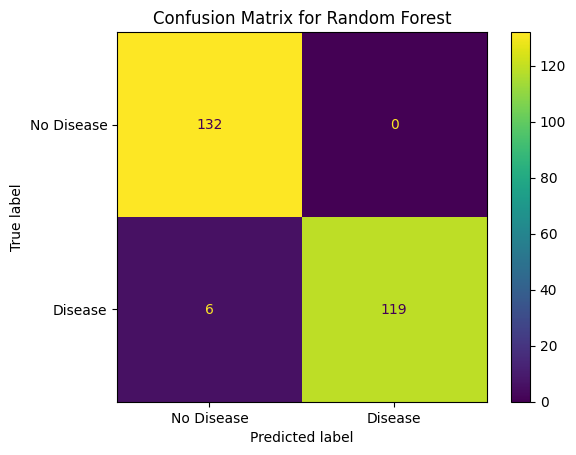

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/Liz283/DataMining/main/heart.csv"
data = pd.read_csv(url)

# Define categorical and numerical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Define the ColumnTransformer to apply different preprocessing to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply the preprocessing to the dataset, excluding the target variable if present
X_processed = preprocessor.fit_transform(data.drop(['target'], axis=1) if 'target' in data.columns else data)
y = data['target'] if 'target' in data.columns else None

# Load the dataset
url = "https://raw.githubusercontent.com/Liz283/DataMining/main/heart.csv"
data = pd.read_csv(url)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.25, random_state = 42)

# Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

# Random Forest model
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Function to print results
def print_model_results(y_test, y_pred, model_name):
    matrix = confusion_matrix(y_test, y_pred)
    label_names = ['No Disease', 'Disease']  # Adjust based on your label encoding
    confusion_df = pd.DataFrame(matrix, columns='Predicted ' + pd.Series(label_names), index='Is ' + pd.Series(label_names))
    print(f"Results for {model_name}:\n")
    print(confusion_df)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label_names)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Print results for Naive Bayes
print_model_results(y_test, y_pred_nb, 'Naive Bayes')

# Print results for Random Forest
print_model_results(y_test, y_pred_rf, 'Random Forest')
